In [2]:
#These are libraries that you should import if needed for your notebook.
#import libraries
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# Chance


At the most basic level, probability seeks to answer the question, “What is the chance of an event happening?”

An event is some outcome of interest.

To calculate the chance of an event happening, we also need to consider all the other events that can occur.


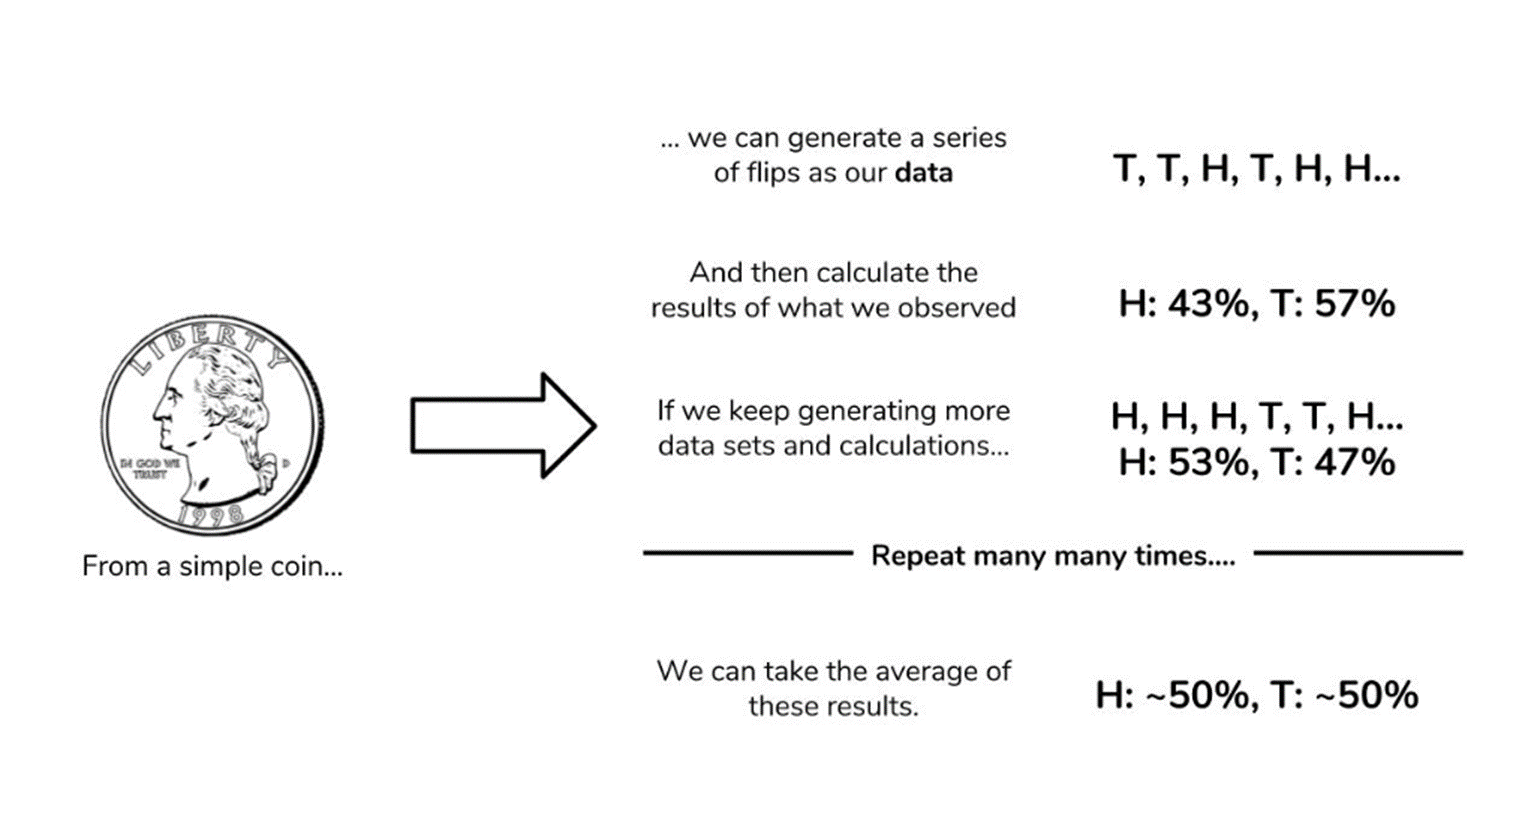

## Law of Averages / Law of Large Numbers

If a chance experiment is repeated many times, independently and under the same conditions, then the proportion of times that an event occurs gets closer to the theoretical probability of the event.


## Multiplication rule

Chance that two events A and B both happen

= P(A happens) x P(B happens)

The answer is less than or equal to each of the two chances being multiplied

The more conditions you have to satisfy, the less likely you are to satisfy them all

## Addition rule

If event A can happen in exactly one of two ways, then

P(A) = P(first way) + P(second way)

The answer is greater than or equal to the chance of each individual way

## Random

Suppose you have three cards each with a unique colour - Red, Green and Blue.
I shuffle the cards and ask you to draw one card.
What is the chance the card will be Red?

In [4]:
cards = np.array(['Red', 'Green', 'Blue'])
cards

array(['Red', 'Green', 'Blue'], dtype='<U5')

In [5]:
np.random.choice(cards)

np.str_('Red')

In [11]:
game = np.random.choice(cards, 100)
game

array(['Red', 'Blue', 'Blue', 'Blue', 'Blue', 'Red', 'Green', 'Red',
       'Red', 'Red', 'Green', 'Blue', 'Green', 'Red', 'Green', 'Red',
       'Green', 'Green', 'Green', 'Blue', 'Blue', 'Blue', 'Green', 'Blue',
       'Red', 'Green', 'Red', 'Blue', 'Blue', 'Green', 'Green', 'Red',
       'Blue', 'Red', 'Green', 'Red', 'Blue', 'Blue', 'Blue', 'Blue',
       'Blue', 'Blue', 'Green', 'Green', 'Green', 'Red', 'Green', 'Red',
       'Green', 'Red', 'Red', 'Green', 'Red', 'Green', 'Red', 'Blue',
       'Blue', 'Red', 'Red', 'Green', 'Red', 'Red', 'Red', 'Red', 'Blue',
       'Blue', 'Blue', 'Blue', 'Red', 'Red', 'Blue', 'Red', 'Green',
       'Blue', 'Green', 'Blue', 'Blue', 'Blue', 'Green', 'Blue', 'Blue',
       'Red', 'Green', 'Blue', 'Green', 'Green', 'Green', 'Red', 'Red',
       'Green', 'Red', 'Green', 'Blue', 'Blue', 'Green', 'Red', 'Red',
       'Blue', 'Blue', 'Blue'], dtype='<U5')

In [12]:
array_of_reds = (game == "Red")
array_of_reds
# false = 0
# True = 1

array([ True, False, False, False, False,  True, False,  True,  True,
        True, False, False, False,  True, False,  True, False, False,
       False, False, False, False, False, False,  True, False,  True,
       False, False, False, False,  True, False,  True, False,  True,
       False, False, False, False, False, False, False, False, False,
        True, False,  True, False,  True,  True, False,  True, False,
        True, False, False,  True,  True, False,  True,  True,  True,
        True, False, False, False, False,  True,  True, False,  True,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False,  True,  True, False,
        True, False, False, False, False,  True,  True, False, False,
       False])

In [13]:
sum(array_of_reds)

np.int64(33)

In [14]:
sum(array_of_reds)/len(array_of_reds)

np.float64(0.33)

In [15]:
sum(np.random.choice(cards, 10) == 'Red')/10

np.float64(0.3)

In [16]:
sum(np.random.choice(cards, 1000) == 'Red')/1000

np.float64(0.325)

In [17]:
# simulate 10000 games
ten_thousand_tires = np.array([])

for draw in np.arange(10000):
    ten_thousand_tires = np.append(ten_thousand_tires, np.random.choice(cards))

sum(ten_thousand_tires=='Red')/10000 



np.float64(0.3325)

**Class Exercise:** Suppose you have three cards each with a unique colour - Red, Green and Blue.
I shuffle the cards and ask you to draw two cards without replacement.
What is the chance or probability the cards will be Red followed by Blue?

Hint: Make use of iteration and conditional statements

In [20]:
succesful_draws = 0

for i in range(10000):
    draw = np.random.choice(cards, size=2, replace=False)
    if draw[0] =='Red' and draw[1] =='Blue':
        succesful_draws += 1

probability = succesful_draws / 10000
print(f"The probability is: {probability}") 

The probability is: 0.1705


**Another version**

# TAKE-HOME EXERCISE

The Monty Hall problem is a famous probability puzzle based on a game show scenario. In this problem, a contestant is presented with three doors: behind one door is a car (the prize), and behind the other two doors are goats. The contestant picks one door, and then the host, Monty Hall, who knows what's behind each door, opens one of the remaining two doors to reveal a goat. The contestant is then given the choice to either stick with their original choice or switch to the other unopened door. To determine the best strategy—whether to stick or switch—simulate this game by running multiple trials and calculating the win rates for both strategies.

# Monty Hall Problem

notes on exercise 

> 3 doors 
- door one = car 
- door two = goat
- door three = goat

> The choice process
- picks one door, if door is correct or not. 
- Monty picks a door showing a goat,
- you pick another door or stay.

> task: Simulate the game, see the win rates. The You need to determine the **"Best Strategy"** of the two.

In [29]:
#import libraries
#import numpy as np

strategy_1 = 0 
strategy_2 = 0  
failed_strategy = 0  
doors = np.array(['car', 'goat', 'goat'])  # Three doors, one car, two goats

for _ in range(1000):
    np.random.shuffle(doors) 
    contestant_choice = np.random.choice(3) 
    
    remaining_doors = [i for i in range(3) if i != contestant_choice and doors[i] == 'goat']
    monty_opens = np.random.choice(remaining_doors) 
    if doors[contestant_choice] == 'goat':
        strategy_1 += 1  
    elif doors[contestant_choice] == 'car':
        strategy_2 += 1  
    
    
    if doors[contestant_choice] != 'car' and doors[contestant_choice] == 'goat':
        failed_strategy += 1

win_rate1 = strategy_1 / 1000  
win_rate2 = strategy_2 / 1000  

print(f'The win rates are:\nSwitch = {win_rate1}\nStick = {win_rate2}')
print(f'Failed attempts: {failed_strategy}')






The win rates are:
Switch = 0.675
Stick = 0.325
Failed attempts: 675
